In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import StringIO
import zipfile

In [30]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
r = requests.get(url).content
s = StringIO.StringIO(r)
zf = zipfile.ZipFile(s,'r')
print zf.namelist()

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [36]:
tablenames = zf.namelist()
tablenames[tablenames.index('Salaries.csv')]

'Salaries.csv'

In [37]:
df = pd.read_csv(zf.open('Salaries.csv'))

In [59]:
Team = pd.read_csv(zf.open('Teams.csv'))

In [42]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [62]:
Team = Team[['yearID','teamID','W']]
Team.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


In [57]:
TotalSalaries = df.groupby(['yearID','teamID'], as_index = False).sum()

In [58]:
TotalSalaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [67]:
joined = pd.merge(Team, TotalSalaries, how='inner', on=['yearID', 'teamID'])

In [68]:
joined.head()

,yearID,teamID,W,salary
0,1985,TOR,99,8812550
1,1985,NYA,97,14238204
2,1985,DET,84,10348143
3,1985,BAL,83,11560712
4,1985,BOS,81,10897560


In [77]:
set(joined['yearID'])

{1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013}

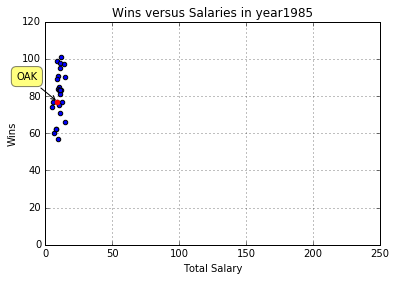

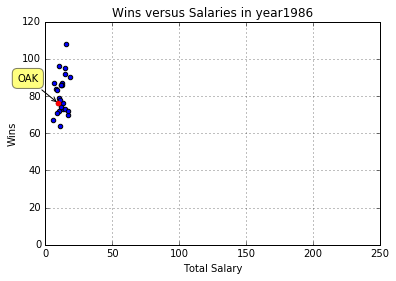

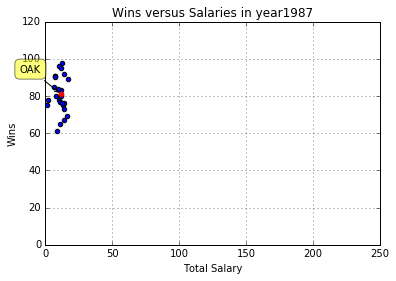

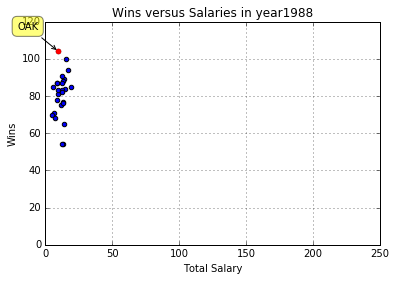

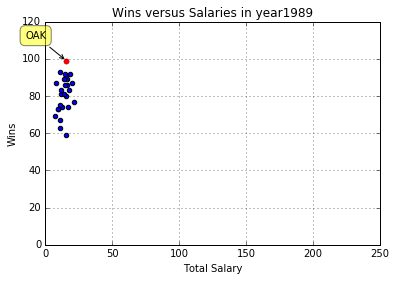

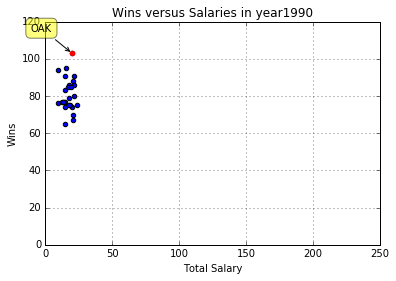

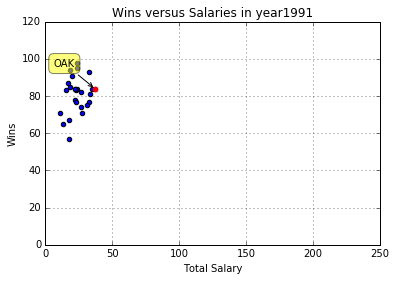

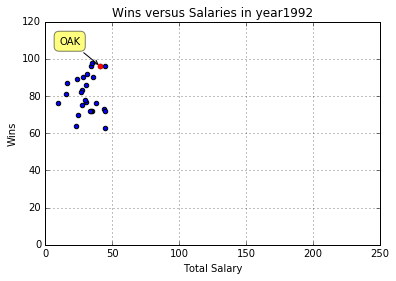

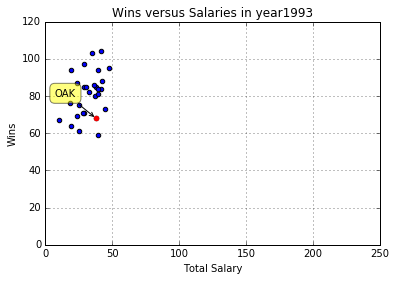

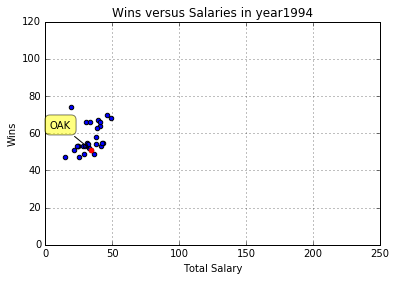

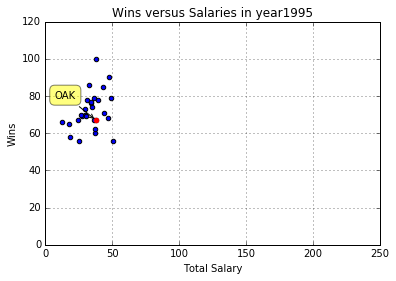

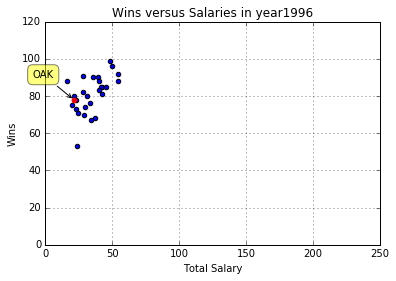

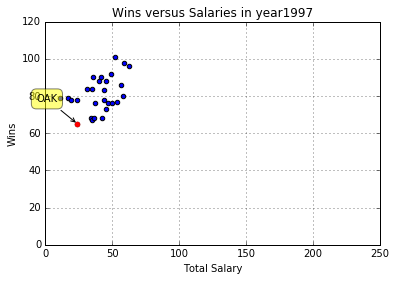

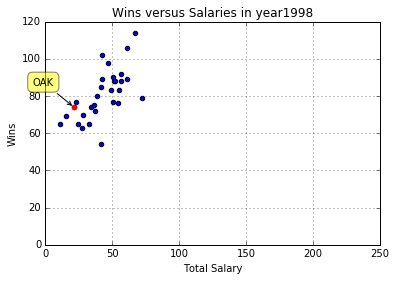

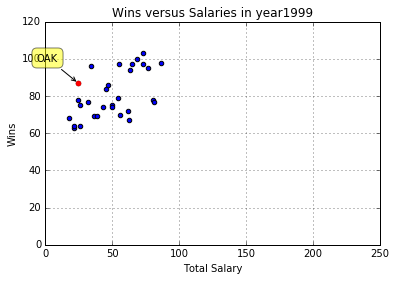

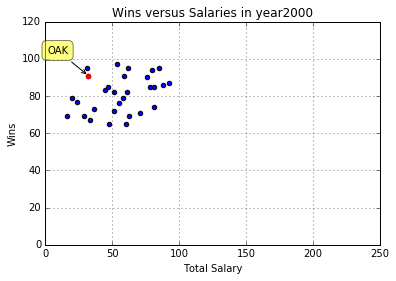

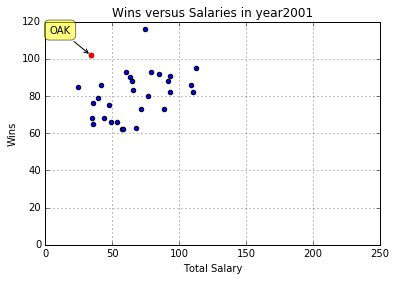

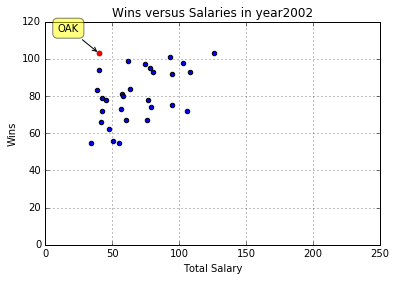

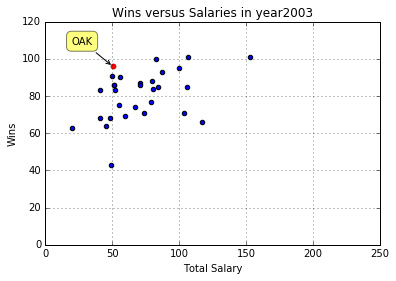

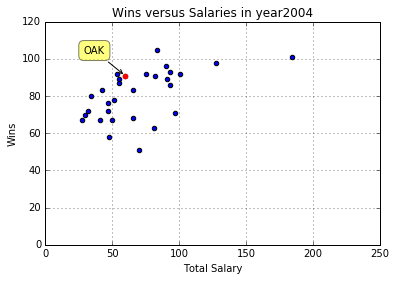

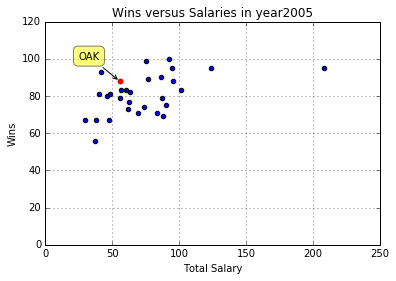

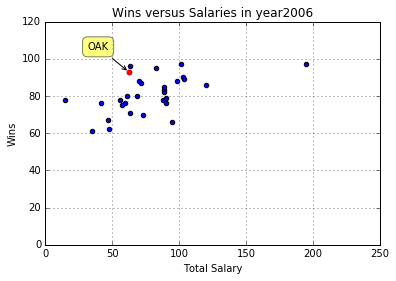

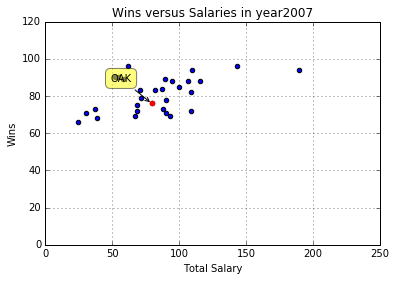

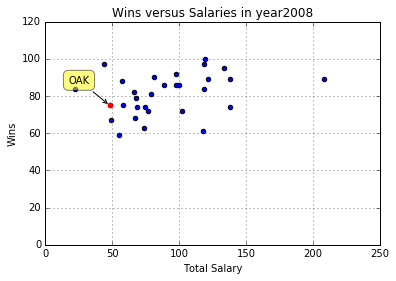

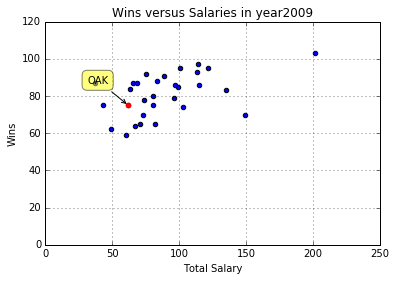

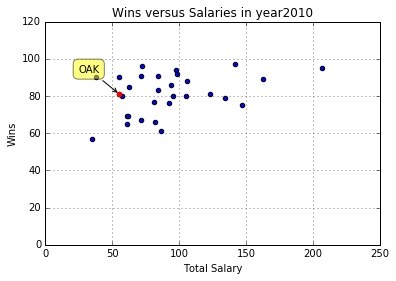

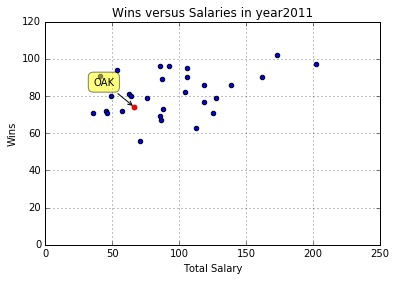

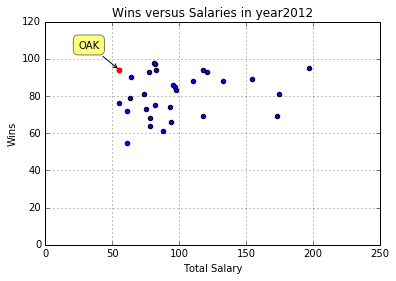

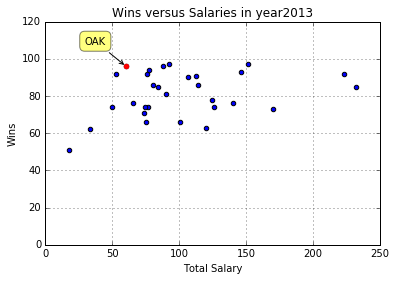

In [120]:
for years in set(joined['yearID']):
    one_year = joined[joined['yearID'] == years]
    plt.scatter(one_year['salary'] / 1e6, one_year['W'])
    oak_ind = one_year['teamID'] == 'OAK'
    plt.scatter(one_year[oak_ind]['salary'] / 1e6, one_year[oak_ind]['W'], color = 'r')
    plt.xlabel('Total Salary')
    plt.ylabel('Wins')
    plt.xlim([0, 250])
    plt.ylim([0, 120])
    plt.title('Wins versus Salaries in year' + str(years))
    plt.grid()
    
    teamName = 'OAK'
    plt.annotate(teamName, 
        xy = (one_year['salary'][one_year['teamID'] == teamName] / 1e6,  one_year['W'][one_year['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    
    plt.show()

In [1]:
years_range = np.arange(1999,2005)
rs = pd.DataFrame()
final = pd.DataFrame()

for yr in years_range:
    one_year = joined[joined['yearID'] == yr]
    y = one_year['W'].values
    x = one_year['salary'].values / 1e6
    A = np.array([x,np.ones(len(x))]).T
    res = np.linalg.lstsq(A, y)[0]
    rs = pd.DataFrame(y - x*res[0] - res[1], columns = [str(yr)])
    rs.index = one_year['teamID']
    final = pd.concat([final, rs], axis = 1)

NameError: name 'np' is not defined

Index([u'ANA', u'ARI', u'ATL', u'BAL', u'BOS', u'CAL', u'CHA', u'CHN', u'CIN',
       u'CLE', u'COL', u'DET', u'FLO', u'HOU', u'KCA', u'LAA', u'LAN', u'MIA',
       u'MIL', u'MIN', u'ML4', u'MON', u'NYA', u'NYN', u'OAK', u'PHI', u'PIT',
       u'SDN', u'SEA', u'SFN', u'SLN', u'TBA', u'TEX', u'TOR', u'WAS'],
      dtype='object')


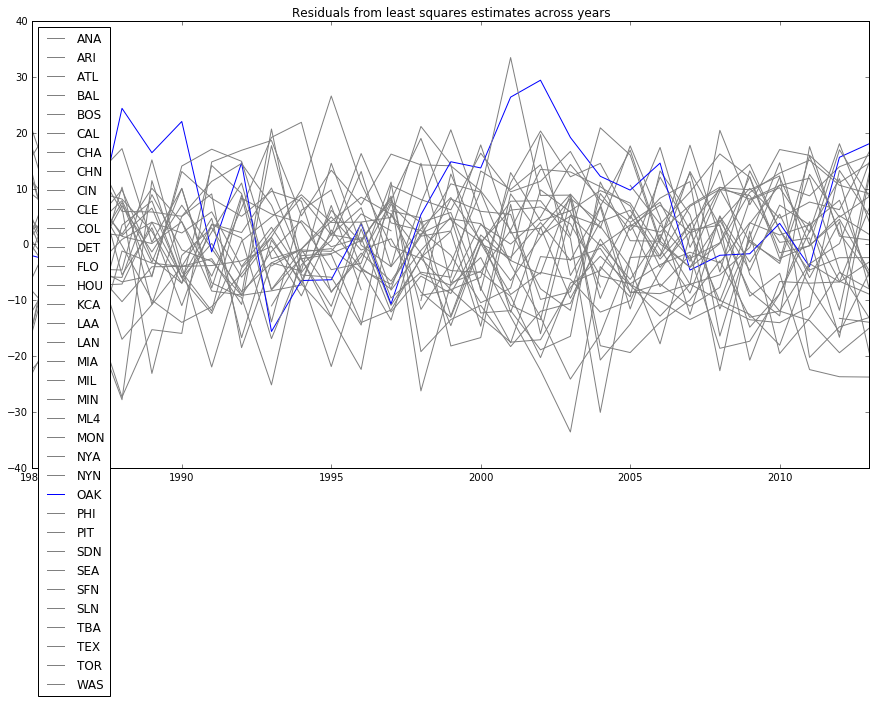

In [343]:
print final.index
final.T.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x == u'OAK' else 'gray',final.index))